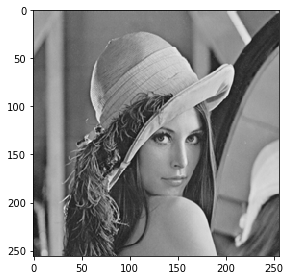

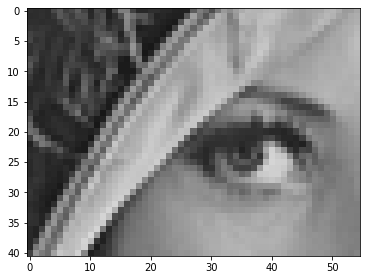

(256, 256)
(41, 55, 3)
(41, 55)


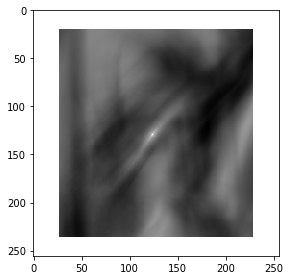

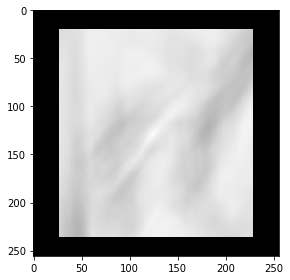

33148
[129, 124]


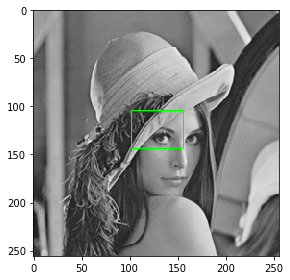

In [3]:

# 必要なライブラリの読み込み
from skimage import data
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
data_dir = './drive/My Drive/Colab Notebooks/sample_data/ImgData/'
########################
#練習２
from skimage import io

# 画像の読み込み
# 配布データ以外を読み込む場合はio.imreadを使う
lenna = io.imread(data_dir + "LENNA.bmp")
template = io.imread(data_dir + "lenna_template2.bmp")

# 画像の確認
io.imshow(lenna)
io.show()
io.imshow(template)
io.show()
print(lenna.shape)
print(template.shape)
template = template[:,:,0] # カラー画像からグレースケール画像へ
print(template.shape)

N,M = lenna.shape # 全体画像のサイズ
wx,wy = template.shape # template画像のサイズ
hwx = int((wx-1)/2) # template画像の幅（中心から端までの距離）
hwy = int((wy-1)/2) # template画像の幅（中心から端までの距離）
D = np.zeros(lenna.shape) #距離画像
S = np.zeros(lenna.shape) #類似度画像
a = template.reshape([template.size])
a = a.astype(np.float64)
for i in range(hwx,N-hwx):
    for j in range(hwy,M-hwy):
        tmp = lenna[i-hwx:i+hwx+1,j-hwy:j+hwy+1] # 全体画像からの切り取り
        b = tmp.reshape([tmp.size]) # ベクトル化
        b = b.astype(np.float64) # 型を実数に変更
        dis = np.linalg.norm(a-b) # 距離を算出
        sim = np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b)) #類似度を計算
        D[i,j] = dis # 距離マップの画素(i,j)に距離dを代入
        S[i,j] = sim # 類似度マップの画素(i,j)に類似度simを代入

# visualization
D = D/np.max(D)#正規化
io.imshow(1-D) #類似度に変換
plt.show()

S2 = (S-np.min(S))/(np.max(S)-np.min(S)) # 正規化
S2[S2<0] = 0 #0以下の要素を0にする
io.imshow(S2)
plt.show()

print(S.argmax()) # 最大値のインデックス（ベクトル化した際のインデックス）
iy,ix = np.unravel_index(S.argmax(), S.shape) # unravel_index: 画像内のインデックスへ変換
print([iy,ix]) # iy,ix は、Bounding Boxの中心

# 類似度が最大となる枠を緑色で表示
from skimage.color import gray2rgb
im = gray2rgb(lenna)
im[ix-hwx,iy-hwy:iy+hwy,:] = [0,255,0] #iy-hwy:iy+hwyで、iy-hwyからiy+hwyという範囲を丸ごと指定
im[ix+hwx,iy-hwy:iy+hwy,:] = [0,255,0]
im[ix-hwx:ix+hwx,iy-hwy,:] = [0,255,0]
im[ix-hwx:ix+hwx,iy+hwy,:] = [0,255,0]
io.imshow(im)
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


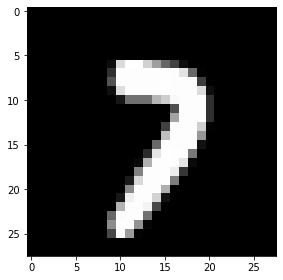

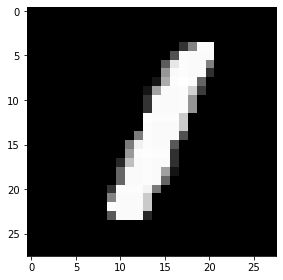

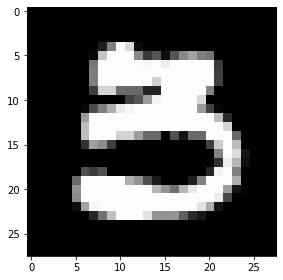

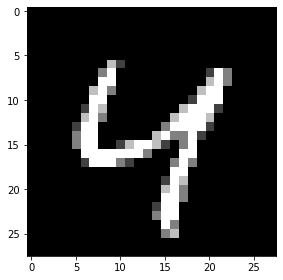

dist 7 to 1 = 2356.813951078871
dist 7 to 3 = 3232.588436531938
dist 7 to 4 = 2109.1695048051497
7 と一番近い数字は，4 です


In [4]:
########################
#練習３: nearest neighbor
from skimage import io
import numpy as np
data_dir = './drive/My Drive/Colab Notebooks/sample_data/ImgData/'

#画像の読み込み
infile = data_dir + 'numbers/7/number029.tif'
im7 = io.imread(infile)
infile = data_dir + 'numbers/1/number1-08.tif'
im1 = io.imread(infile)
infile = data_dir + 'numbers/3/number015.tif'
im3 = io.imread(infile)
infile = data_dir + 'numbers/4/number014.tif'
im4 = io.imread(infile)

#画像の確認
io.imshow(im7)
io.show()
io.imshow(im1)
io.show()
io.imshow(im3)
io.show()
io.imshow(im4)
io.show()

# 画像のベクトル化
numlist = [1, 3, 4]
v7 = im7.reshape([im7.size])
v1 = im1.reshape([im1.size])
v3 = im3.reshape([im3.size])
v4 = im4.reshape([im4.size])

# 距離を求める
dis1 = np.linalg.norm(v1-v7) # 7 と　1の距離
dis3 = np.linalg.norm(v3-v7) # 7 と　3の距離
dis4 = np.linalg.norm(v4-v7) # 7 と　4の距離

print("dist 7 to 1 = {}".format(dis1))
print("dist 7 to 3 = {}".format(dis3))
print("dist 7 to 4 = {}".format(dis4))

# 距離が最小を取得
a = [dis1, dis3, dis4]
indx = np.argmin(a) #最小値のindexを取得

# 出力
print('7 と一番近い数字は，{} です'.format(numlist[indx]))

